In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

#statistics tools
import statsmodels.api as sm
import scipy.stats as st
from scipy.stats import shapiro, mannwhitneyu, chi2_contingency

#scikit learn framework
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv("online_shoppers_intention.csv")
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [8]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [10]:
data['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

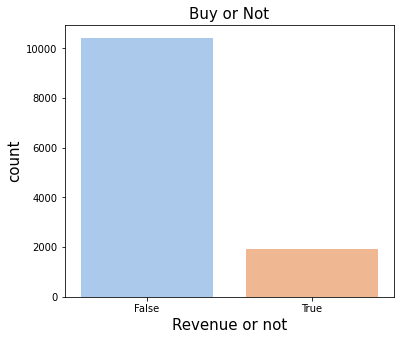

In [11]:
# checking the Distribution of customers on Revenue

plt.rcParams['figure.figsize'] = (13, 5)

plt.subplot(1, 2, 1)
sns.countplot(data['Revenue'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 15)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

In [12]:
data['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

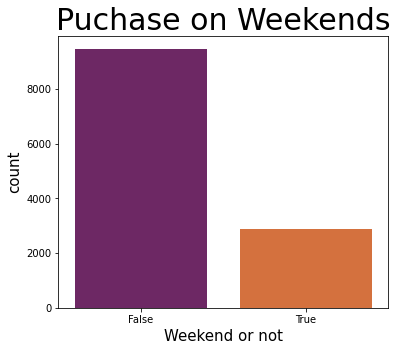

In [13]:
# checking the Distribution of customers on Weekend

plt.rcParams['figure.figsize'] = (13,5)
plt.subplot(1, 2, 2)
sns.countplot(data['Weekend'], palette = 'inferno')
plt.title('Puchase on Weekends', fontsize = 30)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

In [14]:
# checking the no. of Os's is having
data['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

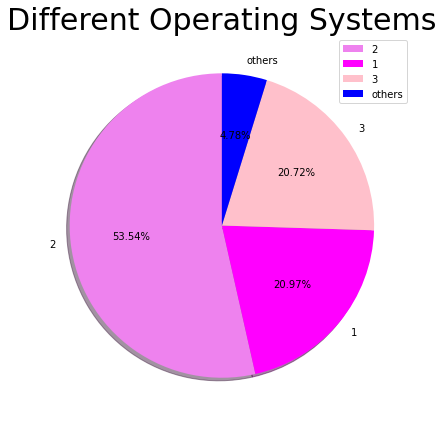

In [15]:
# plotting a pie chart for Operating Systems

plt.rcParams['figure.figsize'] = (18, 7)
size = [6601, 2585, 2555, 589]
colors = ['violet', 'magenta', 'pink', 'blue']
labels = "2", "1", "3", "others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle=90)
plt.title('Different Operating Systems', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

In [16]:
# checking the no. of Browser is having
data['Browser'].value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

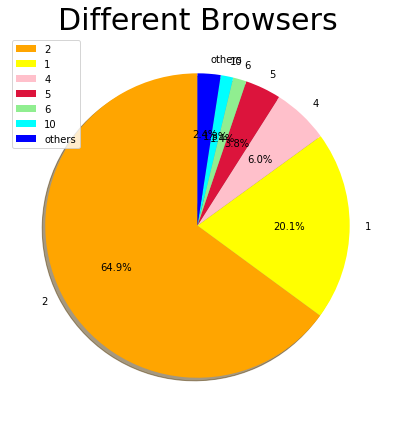

In [17]:
# Ploting a pie chart for operating systems
plt.rcParams['figure.figsize'] = (18, 7)

size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1", "4", "5", "6", "10", "others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.1f%%', startangle = 90)
plt.title('Different Browsers', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

In [18]:
data['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [19]:
data['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [20]:
data['TrafficType'].value_counts()

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

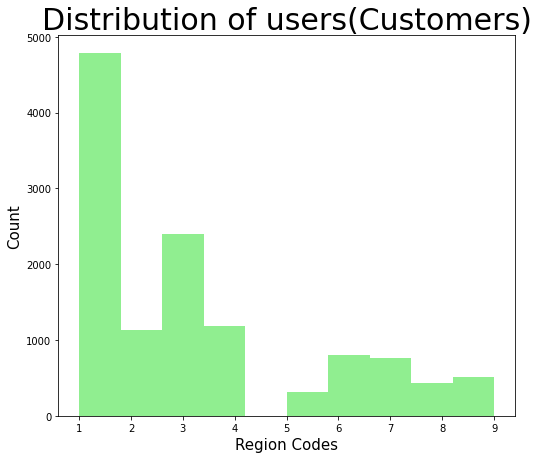

In [21]:
# visualizing the distribution of the users around the Region
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(data['Region'], color = 'lightgreen')
plt.title('Distribution of users(Customers)', fontsize = 30)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

In [22]:
data['SpecialDay'].value_counts()

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

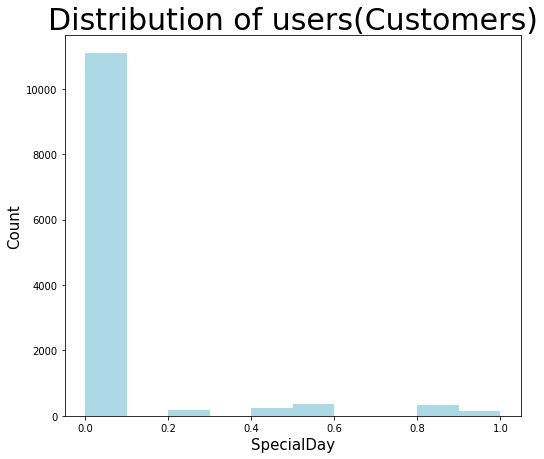

In [23]:
# visualizing the distribution of the users around the SpecialDay
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(data['SpecialDay'], color = 'lightblue')
plt.title('Distribution of users(Customers)', fontsize = 30)
plt.xlabel('SpecialDay', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

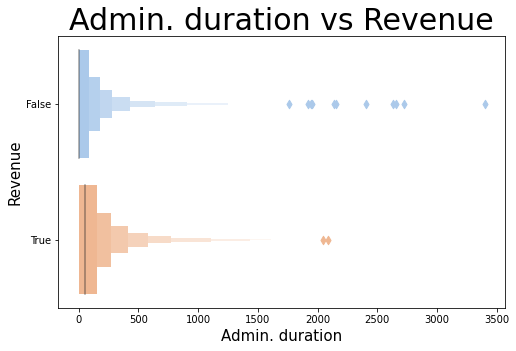

In [24]:
# boxenplot for Administrative duration vs revenue
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(data['Administrative_Duration'], data['Revenue'], palette = 'pastel', orient='h')
plt.title('Admin. duration vs Revenue', fontsize = 30)
plt.xlabel('Admin. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

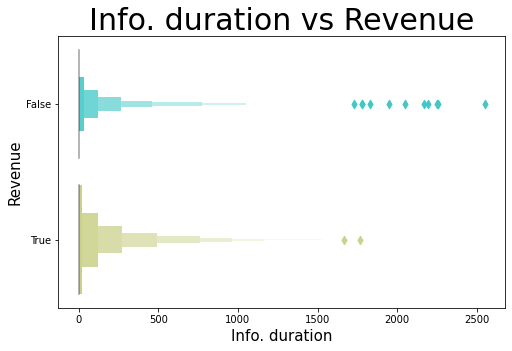

In [25]:
# boxenplot for Informational duration vs revenue
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(data['Informational_Duration'], data['Revenue'], palette = 'rainbow', orient = 'h')
plt.title('Info. duration vs Revenue', fontsize = 30)
plt.xlabel('Info. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

plt.show()

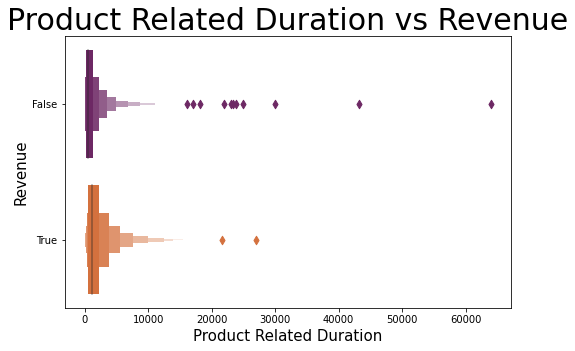

In [26]:
# boxen plot product related duration vs revenue
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(data['ProductRelated_Duration'], data['Revenue'], palette = 'inferno', orient = 'h')
plt.title('Product Related Duration vs Revenue', fontsize = 30)
plt.xlabel('Product Related Duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

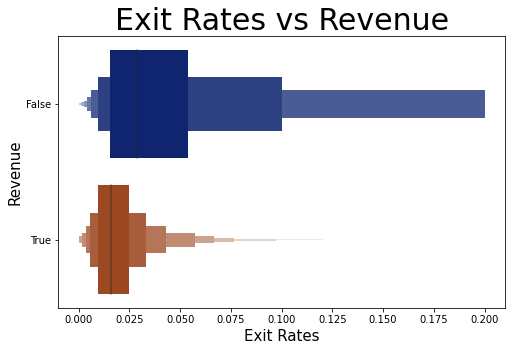

In [27]:
# boxenplot for exit rates vs revenue
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(data['ExitRates'], data['Revenue'], palette = 'dark', orient = 'h')
plt.title('Exit Rates vs Revenue', fontsize = 30)
plt.xlabel('Exit Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

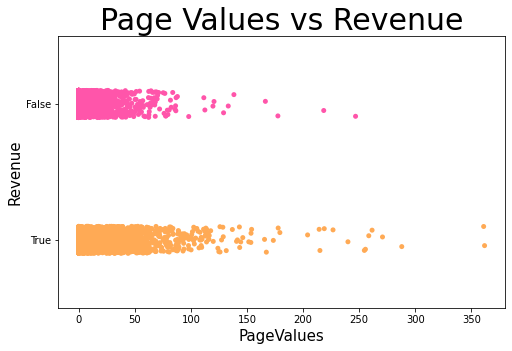

In [28]:
# strip plot for page values vs revenue
plt.rcParams['figure.figsize'] = (8, 5)

sns.stripplot(data['PageValues'], data['Revenue'], palette = 'spring', orient = 'h')
plt.title('Page Values vs Revenue', fontsize = 30)
plt.xlabel('PageValues', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

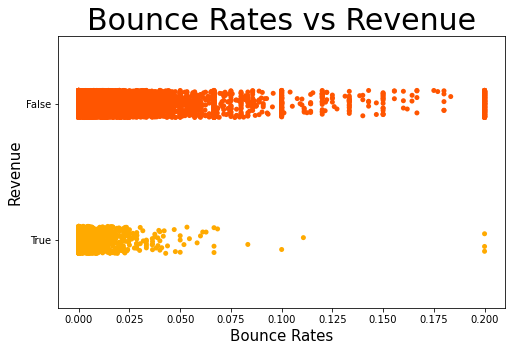

In [29]:
# strip plot for bounce rates vs revenue
plt.rcParams['figure.figsize'] = (8, 5)

sns.stripplot(data['BounceRates'], data['Revenue'], palette = 'autumn', orient = 'h')
plt.title('Bounce Rates vs Revenue', fontsize = 30)
plt.xlabel('Bounce Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

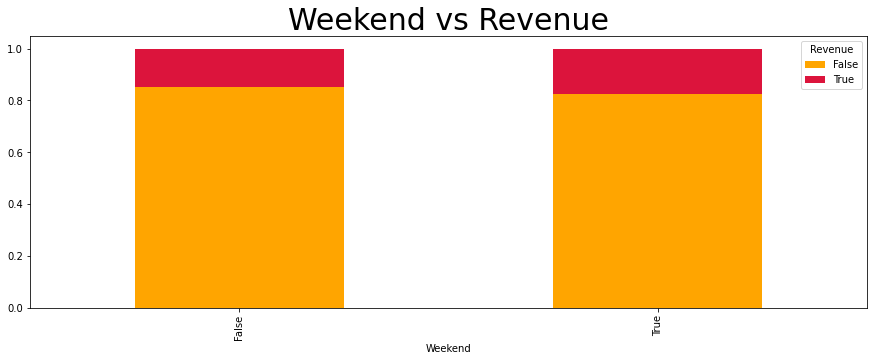

In [30]:
# bar plot for weekend vs Revenue
df = pd.crosstab(data['Weekend'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['orange', 'crimson'])
plt.title('Weekend vs Revenue', fontsize = 30)
plt.show()

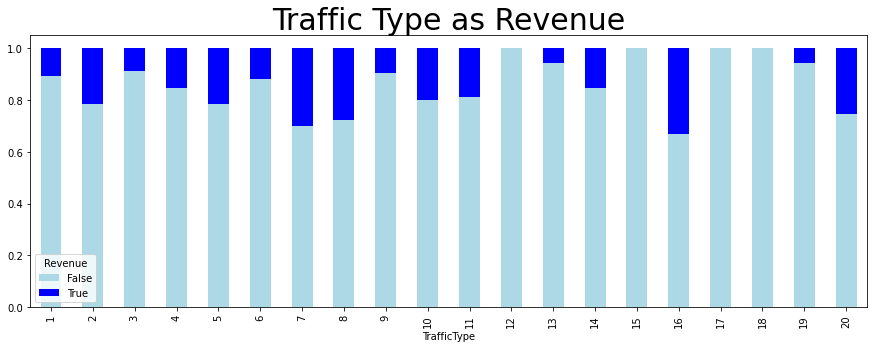

In [31]:
# bar plot for traffic type vs revenue

df = pd.crosstab(data['TrafficType'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightblue', 'blue'])
plt.title('Traffic Type as Revenue', fontsize = 30)
plt.show()

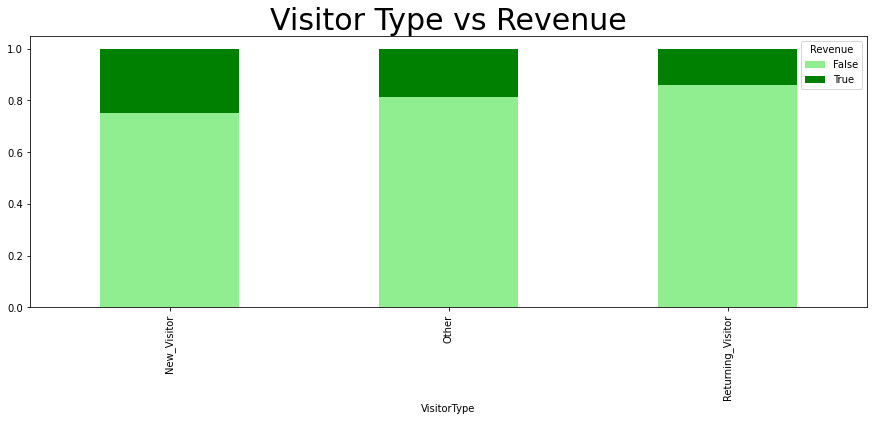

In [32]:
# bar plot for visitor type vs revenue
df = pd.crosstab(data['VisitorType'], data['Revenue'])
df.div(df.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked = True, figsize =(15, 5), color = ['lightgreen', 'green'])
plt.title('Visitor Type vs Revenue', fontsize = 30)
plt.show()

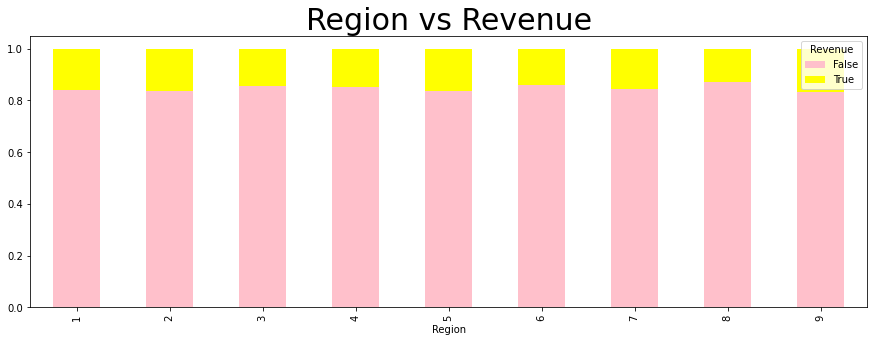

In [33]:
# bar plot for region vs revenue

df = pd.crosstab(data['Region'], data['Revenue'])
df.div(df.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['pink', 'yellow'])
plt.title('Region vs Revenue', fontsize = 30)
plt.show()

In [34]:
multivariate_feature_analysis = [
    ['month vs pagevalues', 'Revenue', 'Gaussian', 'High', 'Low', 'Low', 'High'],
    ['month vs exitrates' , 'Revenue', 'Gaussian', 'Low', 'High', 'Medium', 'Medium'],
    ['month vs bounceRates' , 'Revenue', 'Gaussian', 'Low', 'High', 'Medium', 'High'],
    ['visitor type vs BounceRates' , 'Revenue', 'Exponential', 'Low', 'High', 'Low', 'High'],
    ['visitor type vs exit rates' , 'Revenue', 'Exponential', 'Low', 'High', 'High', 'Medium'],
    ['visitor type vs exit rates', 'Revenue', 'Exponential', 'High', 'Low', 'High', 'Medium'],
    ['region vs pagevalues', 'Revenue', 'Exponential', 'Low', 'High', 'High', 'High'],
    ['rigion vs exit rates', 'Revenue', 'Gaussian', 'High', 'High', 'High', 'Medium'] 
]
feature_summary = pd.DataFrame(multivariate_feature_analysis, columns=['Multivariate_features', 'W.R.T', 'Distribution', 'Revenue_True', 'Revenue_False', 'Outliers', 'Importance'])
feature_summary


,Multivariate_features,W.R.T,Distribution,Revenue_True,Revenue_False,Outliers,Importance
0,month vs pagevalues,Revenue,Gaussian,High,Low,Low,High
1,month vs exitrates,Revenue,Gaussian,Low,High,Medium,Medium
2,month vs bounceRates,Revenue,Gaussian,Low,High,Medium,High
3,visitor type vs BounceRates,Revenue,Exponential,Low,High,Low,High
4,visitor type vs exit rates,Revenue,Exponential,Low,High,High,Medium
5,visitor type vs exit rates,Revenue,Exponential,High,Low,High,Medium
6,region vs pagevalues,Revenue,Exponential,Low,High,High,High
7,rigion vs exit rates,Revenue,Gaussian,High,High,High,Medium


In [35]:
cat_cols=['Administrative','Informational','ProductRelated','Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'SpecialDay']

In [36]:
# Alternative Hypothesis, H1 = proportion of revenue at least in two category is different
scol = []
spval = []
ss = []
for n in cat_cols:
    scol.append(n)
    cp = chi2_contingency(pd.crosstab(data[n], data['Revenue']))[1]
    spval.append(round(cp, 4))
    if cp < 0.05:
        # rejects Null Hypothesis
        ss.append('*') # significant
    else:
        # Accept Null Hypothesis
        ss.append('**') # not significant
        

In [37]:
pd.DataFrame({'Feature': scol, 'P-Value': spval, 'Significance': ss})

,Feature,P-Value,Significance
0,Administrative,0.0000,*
1,Informational,0.0000,*
2,ProductRelated,0.0000,*
3,Month,0.0000,*
4,OperatingSystems,0.0000,*
5,Browser,0.0061,*
6,Region,0.3214,**
7,TrafficType,0.0000,*
8,VisitorType,0.0000,*
9,Weekend,0.0013,*


In [38]:
numerical_columns=['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues']


In [39]:
from scipy.stats import levene

# Two-Sample T-test
tcol = []
tpval = []
ts = []
for n in numerical_columns:
    tcol.append(n)
    # splitting into 2 groups(Revenue = True, Revenue = False)
    g1 = data[n][data['Revenue'] == False]
    g2 = data[n][data['Revenue'] == True]
    # Test for normality(Shapiro Test)
    # H0: Data is normal
    # H1: Data is not normal
    # if p < 0.05 --- reject Null Hypothesis
    for b in [g1]:
        s, p = shapiro(b)
    for c in [g2]:
        s1, p1 = shapiro(c)
    if p > 0.05 or p1 > 0.05:
        w, lp = levene(g1, g2)
    # If doesn't pass normality or variance test, we do non-parametric Test(mannwhitneyu Test)
    if p <= 0.05 or p1 <= 0.05 or lp <= 0.05:
        ms, mp = mannwhitneyu(g1, g2)
        tpval.append(round(mp, 4))
    if mp < 0.05:
        ts.append('*')  # significant
    else:
        ts.append('**') # not significant

In [40]:
pd.DataFrame({'Feature': tcol, 'P-Value': tpval, 'Significance': ts})

,Feature,P-Value,Significance
0,Administrative_Duration,0.0,*
1,Informational_Duration,0.0,*
2,ProductRelated_Duration,0.0,*
3,BounceRates,0.0,*
4,ExitRates,0.0,*
5,PageValues,0.0,*


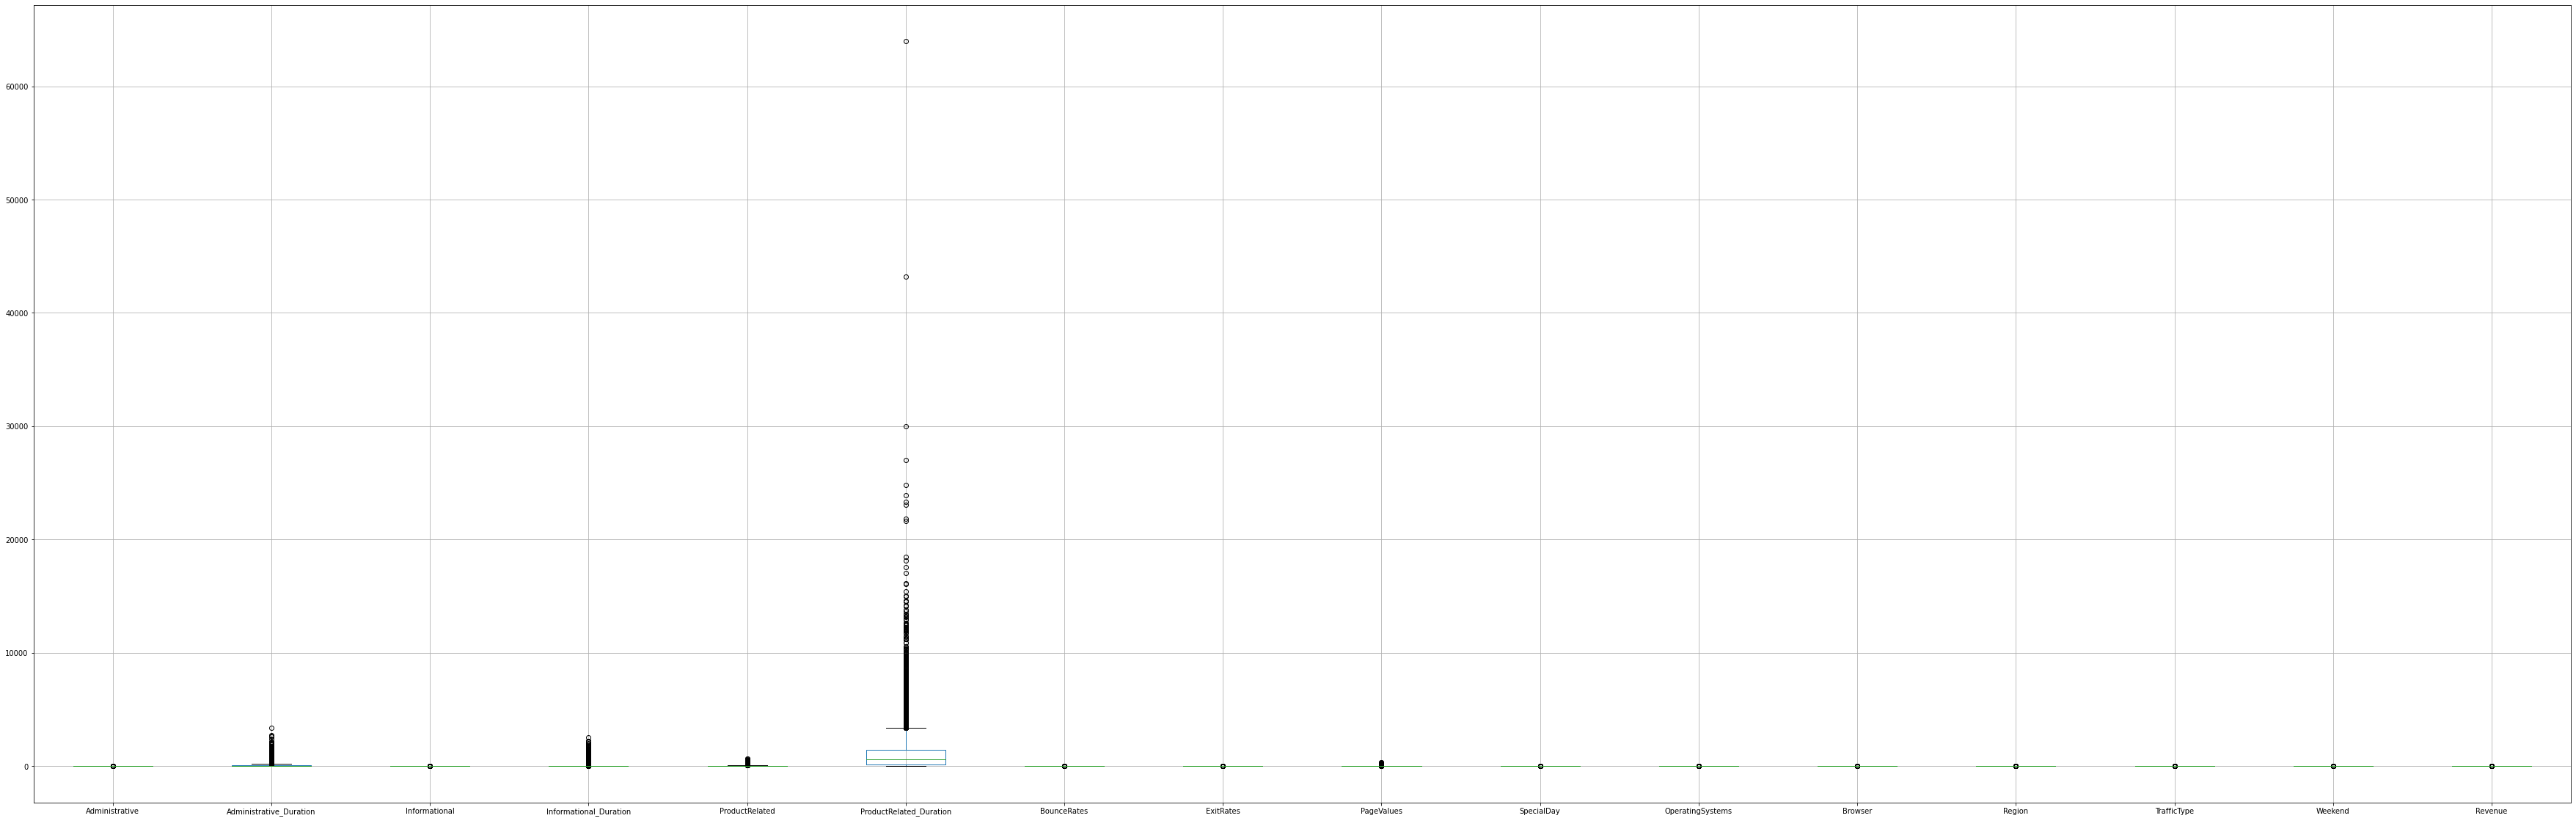

In [41]:
plt.figure(figsize=(62, 20))
data.boxplot();

In [42]:
# identify outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
out_per=[]
for i in numerical_columns:
    data_mean, data_std = mean(data[i]), std(data[i])
    
    # identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print(i, ': \n')

    # identify outliers
    outliers = [x for x in data[i] if x < lower or x > upper]
    
    num_out = len(outliers)
    print('Identified outliers: %d' %num_out)
    outliers_removed = [x for x in data[i] if x >= lower and x <= upper]
    num_nout = len(outliers_removed)
    print('Non-outlier observations: %d' %num_nout)
    outlier_percent = (num_out / (num_out + num_nout)) * 100
    print('Percent of outliers:', outlier_percent, '\n')
    out_per.append(outlier_percent)

Administrative_Duration : 

Identified outliers: 232
Non-outlier observations: 12098
Percent of outliers: 1.8815896188158963 

Informational_Duration : 

Identified outliers: 230
Non-outlier observations: 12100
Percent of outliers: 1.8653690186536902 

ProductRelated_Duration : 

Identified outliers: 219
Non-outlier observations: 12111
Percent of outliers: 1.7761557177615572 

BounceRates : 

Identified outliers: 708
Non-outlier observations: 11622
Percent of outliers: 5.742092457420925 

ExitRates : 

Identified outliers: 713
Non-outlier observations: 11617
Percent of outliers: 5.78264395782644 

PageValues : 

Identified outliers: 259
Non-outlier observations: 12071
Percent of outliers: 2.1005677210056772 



In [43]:
Outliers = pd.DataFrame({'Feature': numerical_columns, '% Of Outliers': out_per})
outlier_sorted = Outliers.sort_values('% Of Outliers', ascending = False)
outlier_sorted

,Feature,% Of Outliers
4,ExitRates,5.782644
3,BounceRates,5.742092
5,PageValues,2.100568
0,Administrative_Duration,1.881590
1,Informational_Duration,1.865369
2,ProductRelated_Duration,1.776156


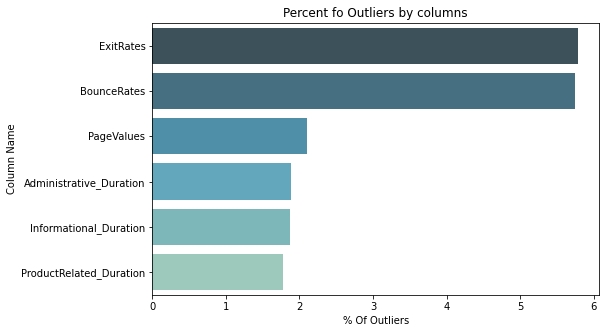

In [44]:
plt.rcParams['figure.figsize'] = (8, 5)
sns.barplot(y = outlier_sorted['Feature'], x = outlier_sorted['% Of Outliers'], palette = 'GnBu_d')
plt.title('Percent fo Outliers by columns')
plt.ylabel('Column Name')
plt.show()

In [45]:
# Imputing Missing Values with 0
data.fillna(0, inplace = True)

#checking the no. of null values after imputing
data.isnull().sum().sum()

0

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'data' is your dataset variable, make sure it is defined properly

# Load your dataset using pandas
data = pd.read_csv('online_shoppers_intention.csv')  # Replace 'your_dataset.csv' with the actual filename and path

# Preparing the dataset
x = data.iloc[:, [1, 6]].values

# Checking the shape of the dataset
print("Shape of the dataset: ", x.shape)

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                max_iter=200,
                n_init=10,
                random_state=0,
                algorithm='elkan',
                tol=0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)

plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.xlabel('No. of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()


Shape of the dataset:  (12330, 2)


AttributeError: 'NoneType' object has no attribute 'split'

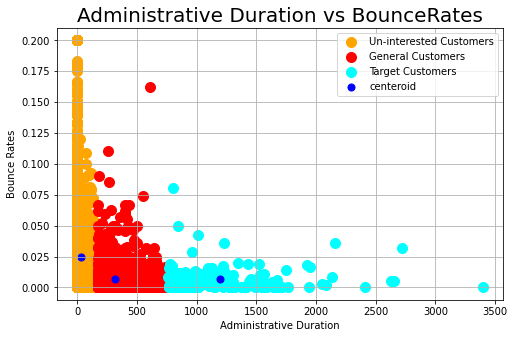

In [48]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'orange', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'red', label = 'General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 50, c = 'blue', label = 'centeroid')

plt.title('Administrative Duration vs BounceRates', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

In [49]:
df1 = pd.get_dummies(data)
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [50]:
# Label encoding of revenue
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Revenue'] = le.fit_transform(df1['Revenue'])
df1['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [51]:
# Splitting dependent and independent variables(columns)
y = df1['Revenue']
x = df1.drop(['Revenue'], axis = 1)

# checking the shapes
print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)

Shape of x:  (12330, 28)
Shape of y:  (12330,)


In [52]:
# Splitting of the Data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =  0.2, random_state = 0)

# checking the shapes

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (9864, 28)
Shape of y_train : (9864,)
Shape of x_test : (2466, 28)
Shape of y_test : (2466,)


In [53]:
# model define and training
model = svm.SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy: ", model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

Training Accuracy:  0.8514801297648013
Testing Accuracy:  0.8317112733171127


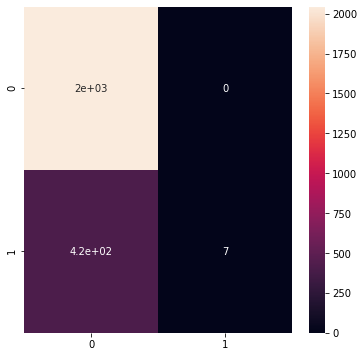

In [54]:
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)
plt.show()

In [55]:
# classification report
cr = metrics.classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2044
           1       1.00      0.02      0.03       422

    accuracy                           0.83      2466
   macro avg       0.92      0.51      0.47      2466
weighted avg       0.86      0.83      0.76      2466



In [56]:
# model define and training
model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy: ", model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

Training Accuracy:  0.7982562854825629
Testing Accuracy:  0.7899432278994323


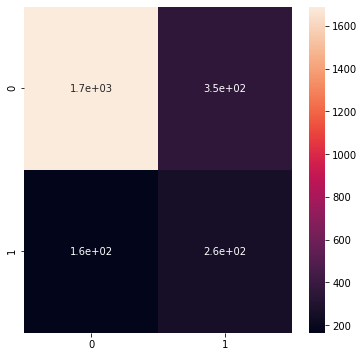

In [57]:
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)
plt.show()

In [58]:
# classification report
cr = metrics.classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      2044
           1       0.42      0.61      0.50       422

    accuracy                           0.79      2466
   macro avg       0.67      0.72      0.68      2466
weighted avg       0.83      0.79      0.80      2466



In [59]:
precision = ['Naive Bayes', 'precision', 0.91, 0.42]
recall = ['Naive Bayes', 'recall', 0.83, 0.61]
f1_score = ['Naive Bayes', 'f1_score', 0.87, 0.50 ]
precision2 = ['Support Vector Machine', 'precision', 0.83, 0.00 ]
recall2 = ['Support Vector Machine', 'recall', 1.0, 0.00 ]
f1_score2 = ['Support Vector Machine', 'f1_score', 0.91, 0.00 ]
table = pd.DataFrame([precision, precision2, recall, recall2, f1_score, f1_score2])
table.columns = ['model_name', 'metrics', 'Is_Revenue(False)', 'Is_Revenue(True)']
table


,model_name,metrics,Is_Revenue(False),Is_Revenue(True)
0,Naive Bayes,precision,0.91,0.42
1,Support Vector Machine,precision,0.83,0.00
2,Naive Bayes,recall,0.83,0.61
3,Support Vector Machine,recall,1.00,0.00
4,Naive Bayes,f1_score,0.87,0.50
5,Support Vector Machine,f1_score,0.91,0.00


array([[<AxesSubplot:title={'center':'Is_Revenue(False)'}>,
        <AxesSubplot:title={'center':'Is_Revenue(True)'}>]], dtype=object)

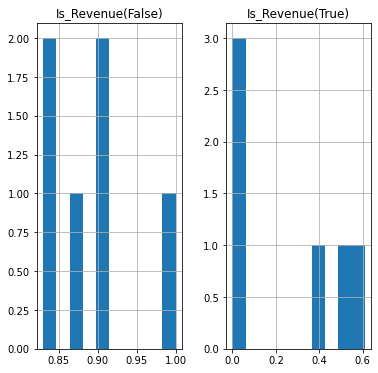

In [60]:
table.hist()